In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from GetAprilTrainTestData import GetAprilTrainTestData

In [85]:
X, y = GetAprilTrainTestData()

7956 7956


In [86]:
print(len(X), len(y))

7956 7956


In [87]:
col_df = pd.DataFrame(X.columns)
col_df.to_csv("data/ssrcolumns.csv")

In [59]:
X.isnull().values.ravel().sum()

0

In [60]:
# Now need to one hot encode all the stuff in X that is categorical. 
X = pd.get_dummies(X)
X.head()

,SETUP_TIME,CYCLES,TESTED_UNITS,RESCREEN_RULE,MSE_RULE,SPC_RULE,INDEX_RULE,MCBJ_RULE,SETUPTIME_RULE,MSE_UNIT,...,TESTERHEAD_vl71_1,TESTERHEAD_vl76_1,TESTERHEAD_vl76_2,TESTERHEAD_vl91_1,TESTERHEAD_vl93_1,TESTERHEAD_vl95_1,TESTERHEAD_vl98_1,TESTERHEAD_vl99_1,TESTERHEAD_vl9_1,LOTSCREENTYPE_FIRST_PASS
0,10.7,423,1888,1,1,1,1,1,1,1.000,...,0,0,0,0,0,0,0,0,0,1
1,6.7,362,1647,1,1,1,1,1,1,0.997,...,0,0,0,0,0,0,0,0,0,1
5,4.6,961,1159,1,1,1,1,1,1,1.000,...,0,0,0,0,0,0,0,0,0,1
8,32.5,638,5760,1,1,1,1,1,1,0.998,...,0,0,0,0,0,0,0,0,0,1
9,4.6,318,2880,1,1,1,1,1,1,1.000,...,0,0,0,0,0,0,0,0,0,1


In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

print(len(X_train), len(y_train), len(X_test), len(y_test))

5967 5967 1989 1989


In [63]:
print(len(X_train), X_train.shape, y_train.shape)

5967 (5967, 2743) (5967, 1)


In [64]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [65]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [66]:
print(len(X_train_scaled), len(y_train_scaled), len(X_test_scaled), len(y_test_scaled))

5967 5967 1989 1989


In [67]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=9, max_iter=100)

# Fitting our model with all of our features in X
model.fit(X_train, y_train)

score = model.score(X_train, y_train)
print(f"R2 Score: {score}")

R2 Score: 0.6623941696857323


In [68]:
score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.5040719452198023


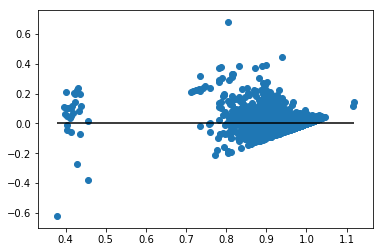

In [69]:
predictions = model.predict(X_train)
plt.scatter(predictions, predictions - y_train)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

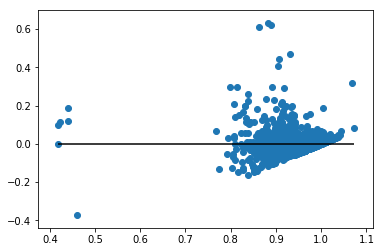

In [70]:
predictions = model.predict(X_test)
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [71]:
len(y_test)

1989

In [72]:
predictions

array([[0.85938204],
       [0.87968845],
       [0.98396142],
       ...,
       [0.90171404],
       [1.00685447],
       [0.84600284]])

In [73]:
test_df = X_test.copy()
test_df["MSYE"] = y_test
test_df["Predictions"] = predictions

In [74]:
test_df.to_csv("data/product_test_data_RidgeRegression.csv")

In [75]:
model.coef_


array([[-4.41418266e-06, -7.95274580e-06,  3.40209972e-06, ...,
         1.21695751e-03, -2.25049258e-02,  0.00000000e+00]])

In [76]:
coefficients = pd.DataFrame({"Feature":X.columns,"Coefficients":np.transpose(model.coef_[0])})
coefficients

,Coefficients,Feature
0,-4.414183e-06,SETUP_TIME
1,-7.952746e-06,CYCLES
2,3.402100e-06,TESTED_UNITS
3,4.314340e-02,RESCREEN_RULE
4,-2.472786e-02,MSE_RULE
5,1.796645e-02,SPC_RULE
6,-2.242510e-03,INDEX_RULE
7,4.026895e-03,MCBJ_RULE
8,2.238784e-03,SETUPTIME_RULE
9,-4.814146e-02,MSE_UNIT


In [77]:
coefficients.to_csv("data/product_test_coefficients.csv")

C:\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.304802975751901e-17 / 1.1102230246251565e-16
  RuntimeWarning)


LogReg Count accuracy at alpha=0.0001: 0.45954740906378094
LogReg Count accuracy at alpha=0.001: 0.45958958748861833
LogReg Count accuracy at alpha=0.01: 0.46000653634616673
LogReg Count accuracy at alpha=0.1: 0.4637591245468927
LogReg Count accuracy at alpha=0.2: 0.4672403015737925
LogReg Count accuracy at alpha=0.3: 0.470194126034312
LogReg Count accuracy at alpha=0.4: 0.47274561848981067
LogReg Count accuracy at alpha=0.5: 0.47497853834247034
LogReg Count accuracy at alpha=0.6: 0.4769528519778967
LogReg Count accuracy at alpha=0.7: 0.4787133887649509
LogReg Count accuracy at alpha=0.8: 0.48029468355138555
LogReg Count accuracy at alpha=0.9: 0.4817239364769749
LogReg Count accuracy at alpha=1: 0.4830229428240698
LogReg Count accuracy at alpha=5: 0.5008957854642493
LogReg Count accuracy at alpha=6: 0.5021884409684418
LogReg Count accuracy at alpha=7: 0.5030801113804986
LogReg Count accuracy at alpha=8: 0.5036838181346343
LogReg Count accuracy at alpha=9: 0.5040719452198023
LogReg Coun

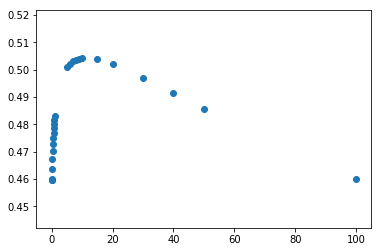

In [78]:
from sklearn.linear_model import Ridge
alpha_vals = [0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9,1,5,6,7,8,9,10,15,20,30,40,50,100]
scores = []
for i in alpha_vals:
    model = Ridge(alpha=i)
    # Fitting our model with all of our features in X
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    scores.append(accuracy)
    print(f"LogReg Count accuracy at alpha={i}: {accuracy}")
    
plt.scatter(alpha_vals, scores)